# Teorema e limitit qëndror dhe shpërndarja propabilistike e mostrës

Teorema e limitit qëndror është teoremë shumë e rëndësishme e propabilitetit.

Definimi i saj matematikor është ky: **Le te jenë {${X_{1}, X_{2}, ..., X_{n}}$} variabla të rastësishme, të pavarura dhe me shpërndarje identike, me vlerë të pritur E[$X_{i}$] = $\mu$ (n $\to$ $\infty$) dhe variancë të fundme. Kur n $\to \infty$, atëherë mesataret e variablave do të konvergjojnë në propabilitet drejt shpërndarjes normale me mesatare $\mu$**.

Për ne është e rëndësishme të kuptojmë implikimet e saj rreth shpërndarjes propabilistike të mostrës. Rrjedhim i kësaj teoreme për mostrën është se kur numri i mostrave që merren nga popullacion rritet, mesatarja e mostrave do të shkoj rreth mesatarës së popullacionit. Poashtu, rrjedhim tjetër është se edhe për shpërndarjet jo-normale mesatarja e mostrave do të ketë shpërndarje normale.

## Marrja e mostrave nga populacioni me Python

In [1]:
import numpy as np # Per algjeber lineare
import seaborn as sns # Per grafika
import statistics as stat # Per kalkulim te statistikave te mostres
import matplotlib.pyplot as plt

np.random.seed(45) # Qe te merrni rezultatet e njejta me te mijat pas ekzekutimit

def mesataret_e_mostrave(popullacioni, madhesia_mostres, numri_mostrave):
    """
    Ky funksion te kthen nje liste te mesatareve te nje numri te mostrave nga nje popullacion qe ja japim!
    """
    mesataret = []
    for _ in range(numri_mostrave):
        mostra = np.random.choice(popullacioni, size=madhesia_mostres, replace=False)
        mesataret.append(mostra.mean())
    return mesataret

def krijo_grafikun(popullacioni, madhesia_mostres, numri_mostrave, titulli, axs=None):
    mesataret = mesataret_e_mostrave(popullacioni, madhesia_mostres, numri_mostrave)
    if axs:
        plot = sns.displot(mesataret, ax=axs) # Kur deshirojme te vendosim disa grafika ne nje figure
    else:
        plot = sns.displot(mesataret)
    plot.set(title=titulli)
    plt.axvline(popullacioni.mean(), color="red")# Mesataren e "vertete" e vendosim me ngjyre te kuqe
    return plot

## Mostrat nga shpërndarja normale

In [2]:
normal_population = np.random.normal(0, 100, 10000)

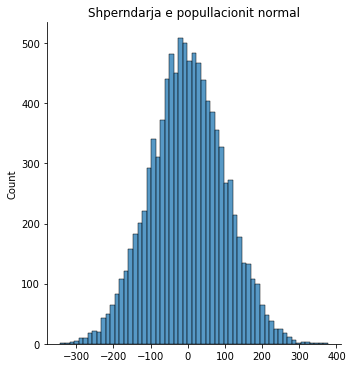

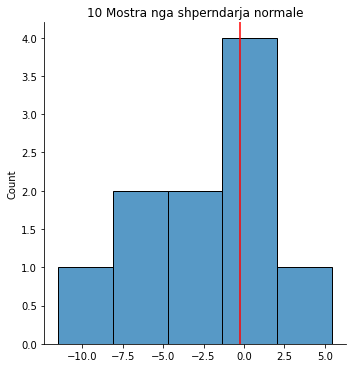

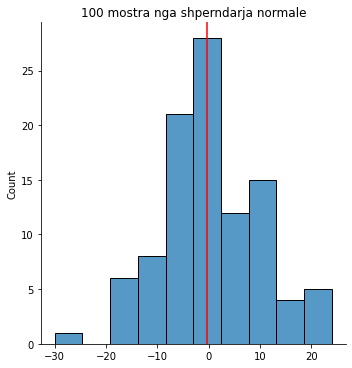

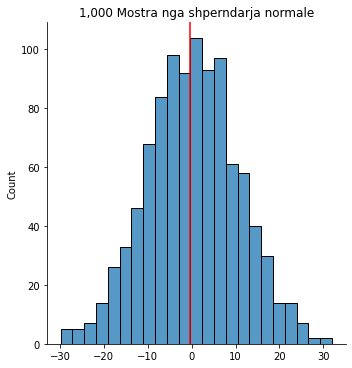

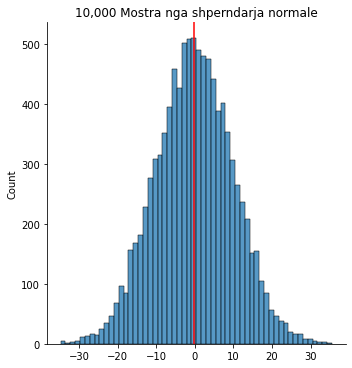

In [3]:
_ = sns.displot(normal_population).set(title="Shperndarja e popullacionit normal")
_ = krijo_grafikun(normal_population, 100, 10, "10 Mostra nga shperndarja normale")
_ = krijo_grafikun(normal_population, 100, 100,"100 mostra nga shperndarja normale")
_ = krijo_grafikun(normal_population, 100, 1000, "1,000 Mostra nga shperndarja normale")
_ = krijo_grafikun(normal_population, 100, 10000, "10,000 Mostra nga shperndarja normale")

## A vlen edhe për shpërndarje jo-normale?

Rrjedhim i teoremës së limitit qëndror është se edhe mostrat nga shpërndarjet jo-normale mund të përshkruhen me shpërndarje normale. Këtë më së miri mund ta shohim me dy shembujt në vijim.

In [4]:
popullacion_i_skajshem = np.random.chisquare(8, 10000)
popullacion_multimodal = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))

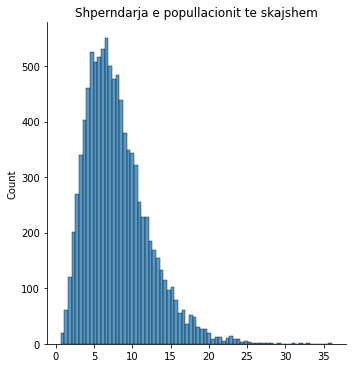

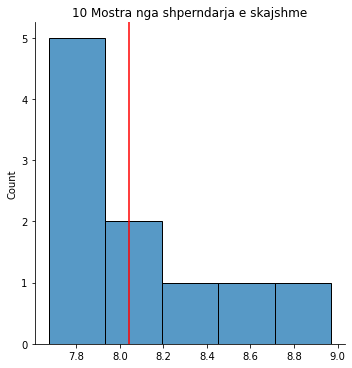

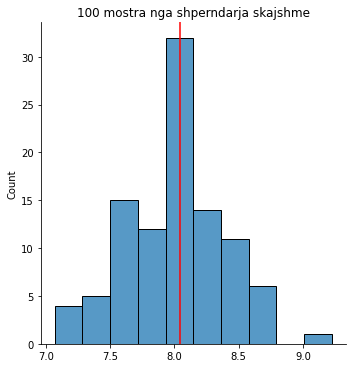

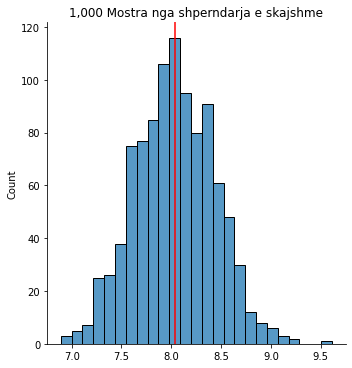

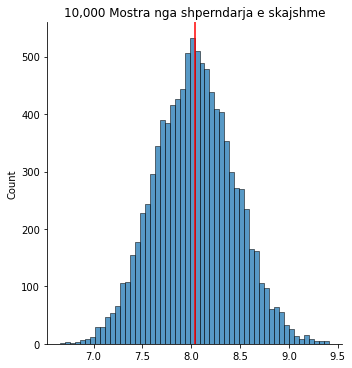

In [5]:
# Per shperndarjen e skajshme
sns.displot(popullacion_i_skajshem).set(title="Shperndarja e popullacionit te skajshem")
krijo_grafikun(popullacion_i_skajshem, 100, 10, "10 Mostra nga shperndarja e skajshme")
krijo_grafikun(popullacion_i_skajshem, 100, 100,"100 mostra nga shperndarja skajshme")
krijo_grafikun(popullacion_i_skajshem, 100, 1000, "1,000 Mostra nga shperndarja e skajshme")
krijo_grafikun(popullacion_i_skajshem, 100, 10000, "10,000 Mostra nga shperndarja e skajshme")

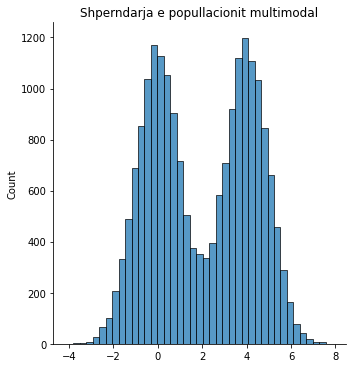

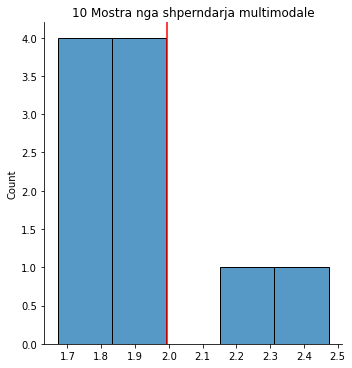

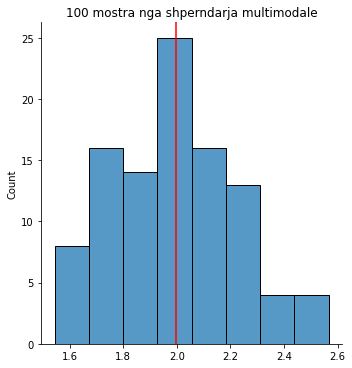

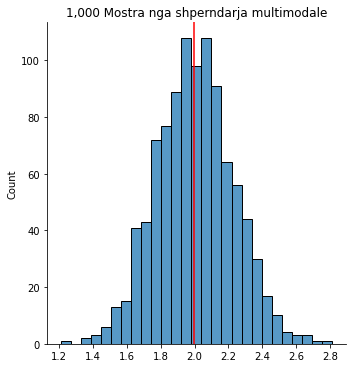

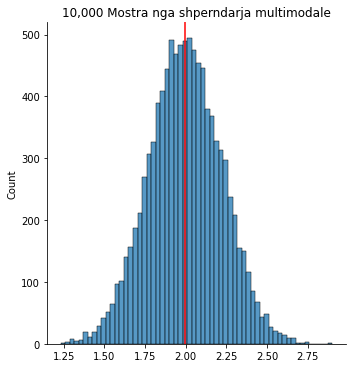

In [6]:
# Per shperndarjen multimodale
sns.displot(popullacion_multimodal).set(title="Shperndarja e popullacionit multimodal")
krijo_grafikun(popullacion_multimodal, 100, 10, "10 Mostra nga shperndarja multimodale")
krijo_grafikun(popullacion_multimodal, 100, 100,"100 mostra nga shperndarja multimodale")
krijo_grafikun(popullacion_multimodal, 100, 1000, "1,000 Mostra nga shperndarja multimodale")
krijo_grafikun(popullacion_multimodal, 100, 10000, "10,000 Mostra nga shperndarja multimodale")

Nga këta shembuj shihet se edhe pse po fillojmë me një popullacion që nuk ka shpërndarje normale, shpërndarja e mesatareve të mostrave është normale.